In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import random

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


<AxesSubplot:>

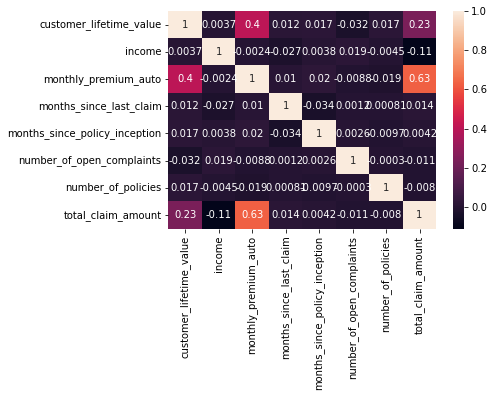

In [3]:
numbers = ["int64", ]
numericals = df.select_dtypes(include=numbers)
sns.heatmap(numericals.corr(), annot=True)

In [4]:
low_coef_num = ["months_since_policy_inception",
"number_of_open_complaints",
"number_of_policies", "customer_lifetime_value"]
numericals.drop(low_coef_num, axis=1, inplace=True)

In [5]:
#filter string features
categories = ["object"]
categoricals = df.select_dtypes(include=categories)
categoricals.drop(["effective_to_date"], axis=1, inplace=True)

In [6]:
#split string features for label and one hot
label_features = ["coverage", "education", "vehicle_class","employment_status"]
label_cat = categoricals[label_features]
categoricals.drop(label_features, axis=1, inplace = True)

In [7]:
label_cat

,coverage,education,vehicle_class,employment_status
0,basic,college,four-door car,employed
1,basic,college,four-door car,unemployed
2,basic,bachelor,suv,employed
3,extended,college,four-door car,employed
4,premium,bachelor,four-door car,medical leave
...,...,...,...,...
10684,premium,bachelor,luxury car,unemployed
10685,basic,college,four-door car,employed
10686,extended,bachelor,luxury suv,employed
10687,premium,college,suv,employed


In [8]:
#onehotencode strin features
encoder = OneHotEncoder()
hotcateg = encoder.fit_transform(categoricals).toarray()
hot_df = pd.DataFrame(hotcateg)
hot_df.columns = encoder.get_feature_names_out()
hot_df

,region_central,region_east,region_north west,region_west region,response_no,response_yes,month_feb,month_jan,gender_f,gender_m,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10685,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10687,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#labelencoding categorical features
labencoder = LabelEncoder()
lc_cov = labencoder.fit_transform(label_cat["coverage"])
lc_edu = labencoder.fit_transform(label_cat["education"])
lc_vc = labencoder.fit_transform(label_cat["vehicle_class"])
lc_es = labencoder.fit_transform(label_cat["employment_status"])

In [10]:
#merging hot encoded features into one df
uni_df= np.stack([lc_cov, lc_edu, lc_vc, lc_es], axis=1)
labeled_df = pd.DataFrame(uni_df, columns=["coverage","education", "vehicle_class","employment_status"])
cat_trans_df = hot_df.join(labeled_df)
cat_trans_df

,region_central,region_east,region_north west,region_west region,response_no,response_yes,month_feb,month_jan,gender_f,gender_m,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,coverage,education,vehicle_class,employment_status
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0,4
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,4,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,1
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2,0,1,4
10685,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1
10686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,0,2,1
10687,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,1,4,1


In [11]:
#cat_dumms = pd.get_dummies(categoricals)

In [12]:
numericals = numericals.join(cat_trans_df)

numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,total_claim_amount,region_central,region_east,region_north west,region_west region,response_no,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,coverage,education,vehicle_class,employment_status
0,4809,48029,61,7,292,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1
1,2228,92260,64,3,744,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0,4
2,14947,22139,100,34,480,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,4,1
3,22332,49078,97,10,484,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,1
4,9025,23675,117,33,707,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,1214,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2,0,1,4
10685,5259,61146,65,7,273,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1
10686,23893,39837,201,11,381,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,0,2,1
10687,11971,64195,158,0,618,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,1,4,1


In [13]:
#low_coef_feauteres = ["number_of_open_complaints","number_of_policies", "months_since_policy_inception","education", "months_since_last_claim"]
#numericals.drop(low_coef_feauteres, axis=1,inplace = True)

In [14]:
pwr = PowerTransformer()
ltv = numericals["customer_lifetime_value"]
ltv_array = ltv.to_numpy()
ltv_array= np.reshape(ltv_array,(-1, 1))
ltv = pwr.fit_transform(ltv_array)
numericals["customer_lifetime_value"] = ltv


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'region_central'}>,
        <AxesSubplot:title={'center':'region_east'}>],
       [<AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_no'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'month_feb'}>,
        <AxesSubplot:title={'center':'month_jan'}>,
        <AxesSubplot:title={'center':'gender_f'}>],
       [<AxesSubplot:title={'center':'gender_m'}>,
        <AxesSubplot:title={'center':'location_code_rural'}>,
        <AxesSubplot:title={'center':'location_code_suburban'}>,
        <AxesSubplo

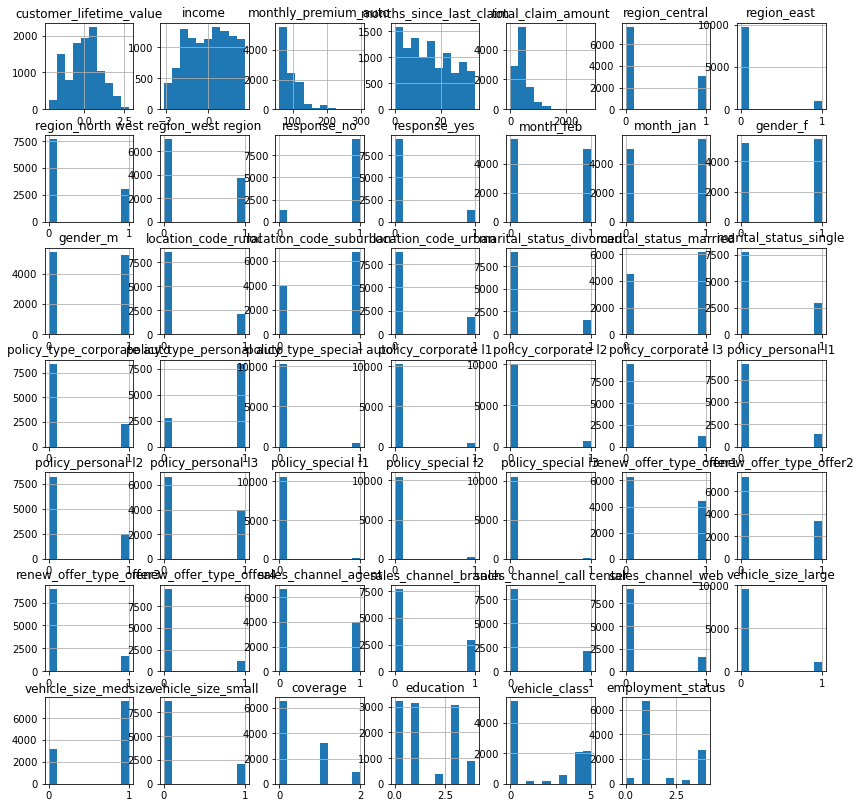

In [15]:
stscl = StandardScaler()
mpa = numericals["income"]
mpa_array = mpa.to_numpy()
mpa_array= np.reshape(mpa_array,(-1, 1))
mpa = pwr.fit_transform(mpa_array)
numericals["income"] = mpa
numericals.hist(figsize=(14,14))

In [16]:
#splitting the target feature
X = numericals.drop("total_claim_amount", axis=1)
y = numericals["total_claim_amount"]

In [17]:
#splitting the testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=123)

In [18]:
std_scl = StandardScaler()
X_trained_tr = std_scl.fit_transform(X_train)
X_test_tr = std_scl.fit_transform(X_test)

In [19]:
X_test_tr = std_scl.fit_transform(X_test)


In [20]:
###statsmodels.api model
#train
X_trained_tr_cons = sm.add_constant(X_trained_tr)
model = sm.OLS(y_train, X_trained_tr_cons).fit()
predict_train = model.predict(X_trained_tr_cons)

#test
X_test_tr_cons = sm.add_constant(X_test_tr)
model = sm.OLS(y_test, X_test_tr_cons).fit()
predict_test = model.predict(X_test_tr_cons)

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     267.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:59:00   Log-Likelihood:                -16927.
No. Observations:                2673   AIC:                         3.392e+04
Df Residuals:                    2638   BIC:                         3.413e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.1467      2.651    166.052      0.0

In [22]:
###Scikit model
sk_model = LinearRegression()
sk_model.fit(X_trained_tr, y_train)

LinearRegression()

In [23]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,region_central,region_east,region_north west,region_west region,response_no,response_yes,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,coverage,education,vehicle_class,employment_status
9424,0.395674,1.337138,95,28,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0,1
7226,-0.397519,-1.903589,125,26,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,4,0
8017,-0.508457,0.385824,110,6,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,1,0,1
6911,0.395283,0.599110,64,23,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,1
10569,-0.593015,-1.947607,117,7,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,-1.168859,0.909104,76,34,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,1,5,1
7763,-0.061615,1.067852,72,14,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,3,5,1
5218,-1.669782,-1.204179,62,5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0,5,1
1346,1.787158,0.988163,66,25,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1


In [24]:
len(sk_model.coef_)

array([-1.90287550e-01, -3.78307677e+00,  1.78709705e+02,  6.06639742e+00,
       -2.80320400e+14, -1.76169124e+14, -2.81000958e+14, -2.97552432e+14,
        7.13188684e+14,  7.13188684e+14,  1.00547112e+15,  1.00547112e+15,
        9.62403378e+14,  9.62403378e+14,  1.96275217e+14,  2.39143412e+14,
        1.88718624e+14,  3.91468313e+14,  5.43610041e+14,  4.89226779e+14,
        1.99281698e+15,  5.80175596e+13,  1.51580794e+14, -4.99239610e+14,
       -5.99669144e+14, -7.87549032e+14,  7.61366850e+14,  9.35025760e+14,
        1.07961697e+15,  1.31495096e+14,  2.05720211e+14,  2.07201040e+14,
       -4.66927868e+14, -4.44544526e+14, -3.50563968e+14, -3.00725412e+14,
       -2.46411911e+13, -2.29877261e+13, -2.04535671e+13, -1.81665306e+13,
        1.51763664e+15,  2.24987067e+15,  1.93775469e+15, -5.42908877e+00,
        1.35261901e+00, -3.71802864e+00,  3.61318774e+01])

In [25]:
y_pred_test = sk_model.predict(X_test_tr)
y_pred_train = sk_model.predict(X_trained_tr)

In [26]:
print(f'model score on training data: {sk_model.score(X_train, y_train)}')
print(f'model score on testing data: {sk_model.score(X_test, y_test)}')

model score on training data: -3.983455051796296e+26
model score on testing data: -4.203435318664136e+26


/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
coefs = pd.DataFrame(
   sk_model.coef_,
   columns=['Coefficients'], index=X_train.columns)
coefs

,Coefficients
customer_lifetime_value,-1.902875e-01
income,-3.783077e+00
monthly_premium_auto,1.787097e+02
months_since_last_claim,6.066397e+00
region_central,-2.803204e+14
region_east,-1.761691e+14
region_north west,-2.810010e+14
region_west region,-2.975524e+14
response_no,7.131887e+14
response_yes,7.131887e+14


In [28]:
y_pred_train

array([342.98914419, 630.1482632 , 541.8900592 , ..., 329.10237068,
       -49.7688591 , 559.20336655])

In [124]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
10256    921
9891     508
9664      84
4810     156
4771     284
Name: total_claim_amount, Length: 2673, dtype: int64

In [125]:
#random prediciton sample
rps = []
for i in range(0, len(X_train.columns)):
    rps.append(X_train.iat[random.randrange(len(X_train)), i])
    

In [126]:
len(rps)

47

In [127]:
## new record prediction
std_scaler = StandardScaler()
new_data_scaled=std_scaler.fit_transform(np.array(rps).reshape(1,-1))

In [128]:
np.array(np.array(rps).reshape(1,-1)).shape

(1, 47)

In [129]:
sk_model.predict(new_data_scaled)

array([432.0284122])

In [133]:
#checking prediction
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

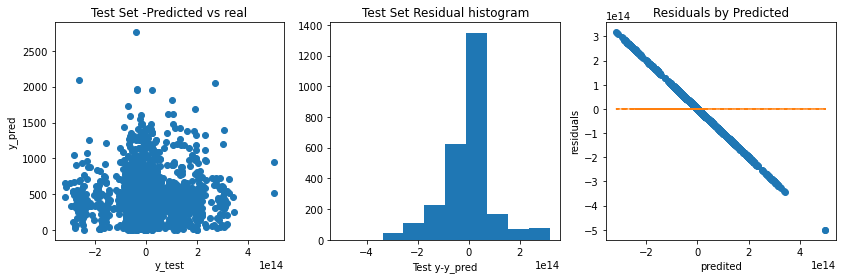

In [138]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test,y_test - y_pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

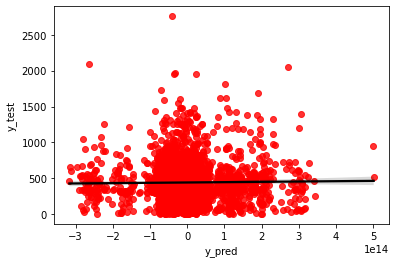

In [139]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [140]:
print(mse(y_test,y_pred_test))
print(mae(y_test,y_pred_test))

9.395786938990843e+27
66636059022849.414


In [143]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(sk_model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
41,vehicle_size_medsize,2.249871e+15
20,policy_type_corporate auto,1.992817e+15
42,vehicle_size_small,1.937755e+15
40,vehicle_size_large,1.517637e+15
28,policy_personal l3,1.079617e+15
10,month_feb,1.005471e+15
11,month_jan,1.005471e+15
13,gender_m,9.624034e+14
12,gender_f,9.624034e+14
27,policy_personal l2,9.350258e+14


In [145]:
df.to_csv("Kirill's_super_bad_prediction.csv")